In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [6]:
def recategorize(data,columnname):
    # only when a feature shared by more than 5% of the totally record, we will retain it
    counts = data[columnname].value_counts()
    nameSet = set(counts[counts>= 0.01*len(data.index)].index.values)
    #print("----132---")
    #print(counts)
    #print(counts[counts>= 0.01*len(data.index)].index.values)
    # at least 5% of all the data
    data.loc[:,columnname] = data[columnname].apply(lambda x:'OTHER'if x not in nameSet else x)
    return data

In [7]:
# read in the data
# the data format is "dataframe"
data = pd.read_csv("training.csv")
#data.head()
print(len(data.index)) # number of data (cars)

data.info()
#如果有一個missing 則去掉此物件
data2 = data.dropna(axis =0, how = 'any', subset = ['Color',
                                                    'Transmission',
                                                    'Nationality',
                                                    'Size',
                                                    'TopThreeAmericanName',
                                                    'MMRAcquisitionAuctionAveragePrice',
                                                    'MMRAcquisitionAuctionCleanPrice',
                                                    'MMRAcquisitionRetailAveragePrice',
                                                    'MMRAcquisitonRetailCleanPrice',
                                                    'MMRCurrentAuctionAveragePrice',
                                                    'MMRCurrentAuctionCleanPrice',
                                                    'MMRCurrentRetailAveragePrice',
                                                    'MMRCurrentRetailCleanPrice'])

72983
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nati

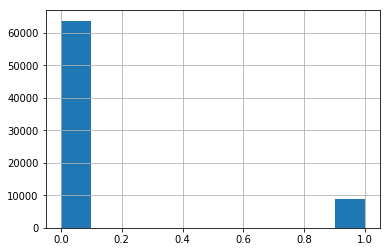

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<class 'pandas.core.frame.DataFrame'>
Int64Index: 72658 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72658 non-null int64
IsBadBuy                             72658 non-null int64
PurchDate                            72658 non-null object
Auction                              72658 non-null object
VehYear                              72658 non-null int64
VehicleAge                           72658 non-null int64
Make                                 72658 non-null object
Model                                72658 non-null object
Trim                                 70301 non-null object
SubModel                             72658 non-null object
Color                                72658 non-null object
Transmission                         72658 non-null object
WheelTypeID                          69499 non-null float64
WheelType                            69494 non-null object
VehOdo                               72658 non-null int64
Nationalit

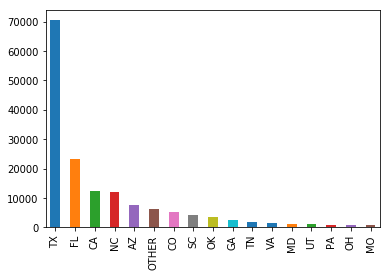

In [12]:
data2.IsBadBuy.hist()
plt.show()
#data2.Make.hist()
data2.Make.value_counts().plot(kind='bar')
#plt.show()

data2 = recategorize(data2, 'Make')
data2.Make.value_counts().plot(kind='bar')

data2 = recategorize(data2, 'Color')
data2.Color.value_counts().plot(kind='bar')

data.Transmission.value_counts().plot(kind='bar')

data.Nationality.value_counts().plot(kind='bar')

data.Size.value_counts().plot(kind='bar')

data.TopThreeAmericanName .value_counts().plot(kind='bar')
data2 = recategorize(data2, 'VNST')
data2.VNST.value_counts().plot(kind='bar')
data2.info()
data2_cleaned = data2.drop(["RefId",
                            "PurchDate",
                            "VehYear",
                            "WheelTypeID",
                            "BYRNO",
                            "VNZIP1",
                            "PRIMEUNIT",
                            "AUCGUART",
                            "Trim"],
                            axis=1)
data2_cleaned.info()

In [9]:
dataFinal = pd.get_dummies(data2_cleaned)
len(list(dataFinal))
dataFinal.head()
Y = dataFinal.loc[:,"IsBadBuy"]
X = dataFinal.drop("IsBadBuy",1)
X.head()
from sklearn.preprocessing import StandardScaler as SC
sc = SC()
Xnew = sc.fit_transform(X)

from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xnew, Y)

In [10]:
lr = LR(C=1.) # create a model, set the parameters (hyperparameter)
lr.fit(X_train, Y_train) # train the model


lr.score(X_test, Y_test) # prediction performance, accuracy
from sklearn.metrics import precision_score,recall_score


precision = precision_score(Y_test, lr.predict(X_test),pos_label=1)
recall = recall_score(Y_test, lr.predict(X_test),pos_label=1)
print(precision)
print(recall)
lr.classes_


0.6404230317273796
0.23716275021758051


array([0, 1], dtype=int64)

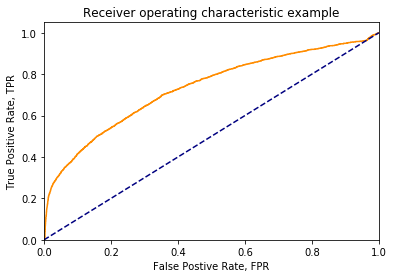

In [11]:

# TPR = TP/P
# FPR = FP/N
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, lr.predict_proba(X_test)[:,1],pos_label=1)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Postive Rate, FPR')
plt.ylabel('True Positive Rate, TPR')
plt.title('Receiver operating characteristic example')
plt.show()